# `geopandas`

:::{admonition} Lesson Content
:class: note, dropdown

- `geopandas` vs. `pandas`
- spatial data operations
- reprojecting to meters
- filtering a geodataframe by a vector

:::

## Context

🐼➕🌐 = 🚀🎉❤️

We've used `pandas` to help us get the most out of our csv and excel data.  We talked yesterday about how spatial data is stored and organized.  Today we combine both worlds with `geopandas`, an extenions of `pandas` specific to spatial data.

Just like how we saw that converting datetime strings to Python datetime objects, converting our latitudes and longitudes to points allows us to use a world more of spatial data analysis techniques.  It's so exciting!

## `geopandas`

GeoPandas is an extension of Pandas. GeoDataFrames have the same row, column structure with indexes that are accessed in the same way as Pandas. The difference is that they also have a `geometry` column.

![Geodataframe](./images/geodataframe.png)

Let's look at an example geodataframe that comes pre-loaded on geopandas.

In [1]:
import geopandas as gpd

In [2]:
gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


What is the data type of the `geometry` column?

## Converting our `pandas` dataframe to a GeoDataFrame

geodataframe = pandas dataframe + geometry column of shapely objects

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

# This line shortens the output
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

_This dataset holds data from the firex campaign. We will be using just a few columns for this lesson_

In [46]:
firex_filepath = "./data/Copy of SARP 2009 to 2020 sent to Alex with plotting.xlsx"
firex = pd.read_excel(firex_filepath, 'data')
firex = firex[['Can#', 'Jday', 'Latitude', 'Longitude', 'State', 'CH4 (ppmv)',
       'CO (ppbv)', 'CO2_ppm', 'OCS (MS)', 'DMS (MS)']].iloc[:4490]

In [47]:
firex

,Can#,Jday,Latitude,Longitude,...,CO (ppbv),CO2_ppm,OCS (MS),DMS (MS)
0,8198,202.0,35.000000,-118.943333,...,-999.0,-999.0,518.0,-888.0
1,7167,202.0,35.081667,-119.101000,...,-999.0,-999.0,519.0,-888.0
2,6354,202.0,35.170000,-119.233333,...,-999.0,-999.0,495.0,14.0
3,7226,202.0,35.346667,-119.381667,...,-999.0,-999.0,505.0,11.9
4,6269,202.0,35.438333,-119.433333,...,-999.0,-999.0,487.0,17.4
...,...,...,...,...,...,...,...,...,...
4485,5090,NaN,29.717200,-95.341600,...,-999.0,-999.0,553.0,4.0
4486,5028,NaN,29.717200,-95.341600,...,-999.0,-999.0,528.0,5.5
4487,5017,NaN,29.717200,-95.341600,...,-999.0,-999.0,583.0,8.6
4488,5091,NaN,29.717200,-95.341600,...,-999.0,-999.0,534.0,3.9


In [48]:
# Drop columns where Latitude or Longitude are nan
firex = firex[firex['Longitude'].notna()]
# Replace both nan values with np.nan
firex = firex.replace({-999: np.nan, -888: np.nan})

If you have string latitude and longitude columns (as in this dataframe) there is a function prebuilt for that common case: `gpd.points_from_xy()`

In [4]:
gpd.points_from_xy(firex['Longitude'], firex['Latitude'])

<GeometryArray>
 ...
Length: 4405, dtype: geometry

In [56]:
geoFIREX = gpd.GeoDataFrame(
    firex, geometry=gpd.points_from_xy(firex['Longitude'], firex['Latitude']), 
    crs='epsg:4326')

In [57]:
geoFIREX

,Can#,Jday,Latitude,Longitude,...,CO2_ppm,OCS (MS),DMS (MS),geometry
0,8198,202.0,35.000000,-118.943333,...,NaN,518.0,NaN,POINT (-118.94333 35.00000)
1,7167,202.0,35.081667,-119.101000,...,NaN,519.0,NaN,POINT (-119.10100 35.08167)
2,6354,202.0,35.170000,-119.233333,...,NaN,495.0,14.0,POINT (-119.23333 35.17000)
3,7226,202.0,35.346667,-119.381667,...,NaN,505.0,11.9,POINT (-119.38167 35.34667)
4,6269,202.0,35.438333,-119.433333,...,NaN,487.0,17.4,POINT (-119.43333 35.43833)
...,...,...,...,...,...,...,...,...,...
4485,5090,NaN,29.717200,-95.341600,...,NaN,553.0,4.0,POINT (-95.34160 29.71720)
4486,5028,NaN,29.717200,-95.341600,...,NaN,528.0,5.5,POINT (-95.34160 29.71720)
4487,5017,NaN,29.717200,-95.341600,...,NaN,583.0,8.6,POINT (-95.34160 29.71720)
4488,5091,NaN,29.717200,-95.341600,...,NaN,534.0,3.9,POINT (-95.34160 29.71720)


:::{admonition} 📝 Check your understanding
:class: tip

What type of data should be in the `geometry` column?

:::

## Spatial data operations

By using `shapely` points we get the advantages of spatial operations built into our DataFrame.

Example question: _How far are all of my data points from Mt. St. Helens?_

In [7]:
from shapely.geometry import Point

In [8]:
mt_st_helens = Point(-122.1956, 46.1914)

In [9]:
geoFIREX['geometry'].distance(mt_st_helens) / 100000

0       0.000117
1       0.000115
2       0.000114
3       0.000112
4       0.000111
          ...   
4485    0.000315
4486    0.000315
4487    0.000315
4488    0.000315
4489    0.000315
Length: 4405, dtype: float64

### Reprojecting to meters

Reprojecting a GeoDataFrame is really smooth, it only takes one `.to_crs()` method.  The only thing to be careful of is to make sure first that you have a crs set for your dataframe.  If you don't and your points are in lat/lon then EPSG:4326 is the CRS you should give it.

In [12]:
# Set the CRS
geoFIREX = geoFIREX.set_crs(epsg=4326)

In [13]:
print(geoFIREX.crs)

epsg:4326


In [14]:
geoFIREX['geometry']

0       POINT (-118.94333 35.00000)
1       POINT (-119.10100 35.08167)
2       POINT (-119.23333 35.17000)
3       POINT (-119.38167 35.34667)
4       POINT (-119.43333 35.43833)
                   ...             
4485     POINT (-95.34160 29.71720)
4486     POINT (-95.34160 29.71720)
4487     POINT (-95.34160 29.71720)
4488     POINT (-95.34160 29.71720)
4489     POINT (-95.34160 29.71720)
Name: geometry, Length: 4405, dtype: geometry

In [15]:
geoFIREXprojcrs = geoFIREX.to_crs(epsg=3857)

In [16]:
geoFIREXprojcrs['geometry']

0       POINT (-13240711.300 4163881.144)
1       POINT (-13258262.673 4174984.864)
2       POINT (-13272993.952 4187007.530)
3       POINT (-13289506.343 4211092.125)
4       POINT (-13295257.850 4223609.598)
                      ...                
4485    POINT (-10613378.363 3467250.090)
4486    POINT (-10613378.363 3467250.090)
4487    POINT (-10613378.363 3467250.090)
4488    POINT (-10613378.363 3467250.090)
4489    POINT (-10613378.363 3467250.090)
Name: geometry, Length: 4405, dtype: geometry

:::{admonition} 📝 Check your understanding
:class: tip

I run the block of code `geoFIREX.to_crs(epsg=3857)` and get the following error:

`ValueError: Cannot transform naive geometries.  Please set a crs on the object first.`

What is likely my problem?

:::

## Quick Plots

<AxesSubplot:>

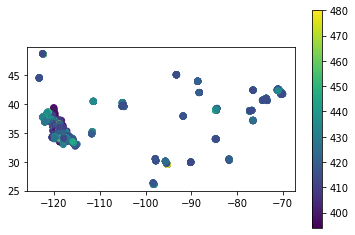

In [62]:
geoFIREX.plot(column='CO2_ppm', legend=True, vmax=480)

In order to use `.explore()` the dataframe must have a CRS set. For more features with the `.explore()` method check out [the geopandas user guide](https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html).

In [33]:
# geoFIREX.explore(tiles="OpenStreetMap")
geoFIREX.explore(tiles="http://c.tile.stamen.com/watercolor/{z}/{x}/{y}.jpg", attr="Stamen Watercolor")

## Filtering a geodataframe by a vector

Let's say we want to know how many measurements were taken within 150 km of mt. st. helens.  We start with our mt. st. helens point and then we buffer it.

In [17]:
# convert our mt st helens 4326 point to 3857

In [18]:
from pyproj import Transformer
from shapely.ops import transform

In [19]:
uc_irvine = Point(-117.835, 33.644)

In [20]:
t = Transformer.from_crs('epsg:4326', 'epsg:3857', always_xy=True).transform
uc_irvine_projcrs = transform(t, uc_irvine)

In [21]:
# Buffer the point
buff_uc_irvine = uc_irvine_projcrs.buffer(10000)

In [22]:
geoFIREXprojcrs['geometry'].intersects(buff_uc_irvine)

0       False
1       False
2       False
3       False
4       False
        ...  
4485    False
4486    False
4487    False
4488    False
4489    False
Length: 4405, dtype: bool

In [23]:
# Notice that we indexed one dataframe by a different dataframe
geoFIREX[geoFIREXprojcrs['geometry'].intersects(buff_uc_irvine)]

,Can#,Jday,Latitude,Longitude,State,CH4 (ppmv),CO (ppbv),CO2_ppm,OCS (MS),DMS (MS),geometry
1779,9068,174.0,33.667200,-117.847000,NaN,1.810,55.0,409.0,570.0,-888.0,POINT (-117.84700 33.66720)
2206,6343,177.0,33.615195,-117.784866,NaN,1.826,56.0,414.0,593.0,0.5,POINT (-117.78487 33.61519)
2234,9309,177.0,33.640604,-117.806361,NaN,1.820,-999.0,419.0,572.0,-888.0,POINT (-117.80636 33.64060)


:::{admonition} 📝 Check your understanding
:class: tip

I want to buffer the mt_st_helens point by 10000m.  What is the problem with the following code I've written below to do that?

`Point(-122.1956, 46.1914).buffer(10000)`

:::